## Scaling, Re-sizing, Interpolations and Cropping

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def imshow(title= "Image", image= None , size=10):
  w,h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size* aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-09-01 16:35:10--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.146
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  13.8MB/s    in 2.0s    

2022-09-01 16:35:13 (13.8 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [6]:
image = cv2.imread('/content/images/oxfordlibrary.jpeg')
imshow("scaling - linear interporeltion", image)

image_scaled = cv2.resize(image, None , fx=0.75, fy=0.75)
imshow('o.75x scaling - linear interpolation', image_scaled)

image_scaled2 = cv2.resize(image, None,fx=2 , fy=2, interpolation = cv2.INTER_CUBIC)
imshow("2x scaling - inter cubic", image_scaled2)

image_scaled3 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
imshow("2x scaling - inter nearest", image_scaled3)

image_scaled4 = cv2.resize(image, (900,400), interpolation = cv2.INTER_AREA)
imshow("scaling - inter area", image_scaled4)

Output hidden; open in https://colab.research.google.com to view.

## Image Pyraminds

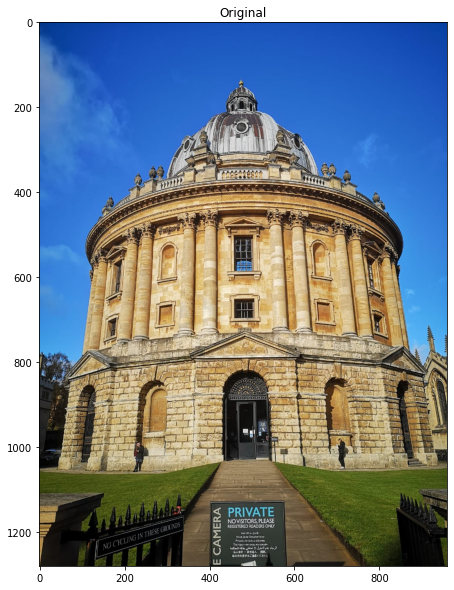

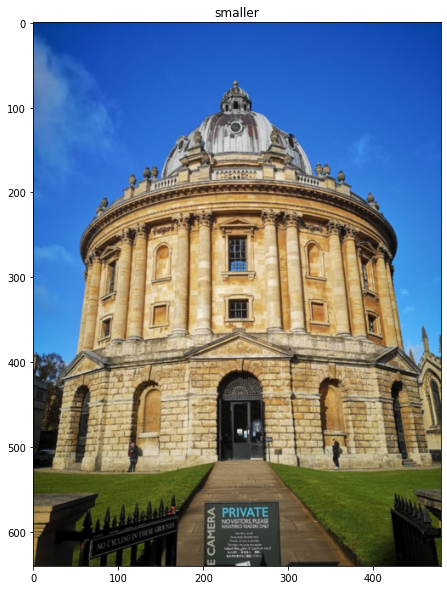

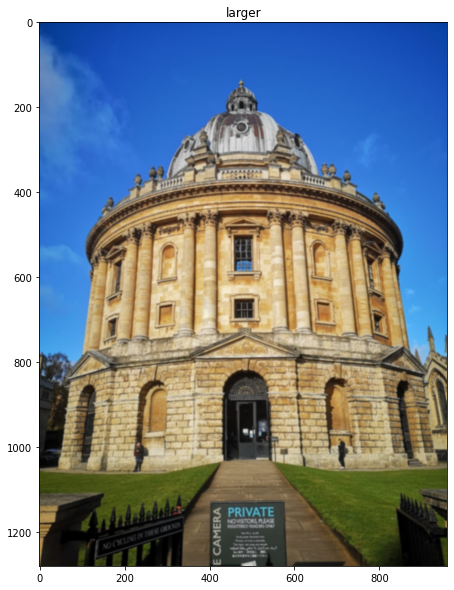

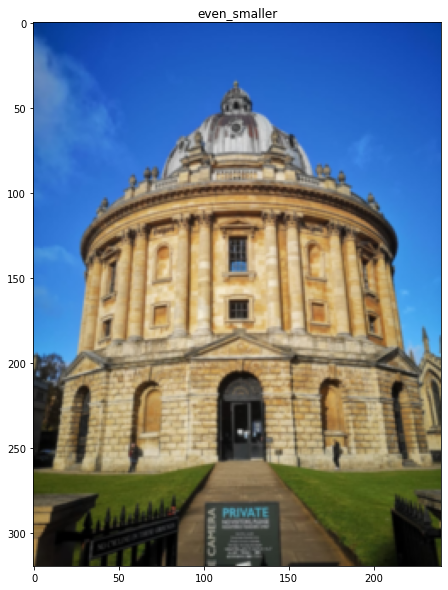

In [9]:
image = cv2.imread('/content/images/oxfordlibrary.jpeg')


smaller= cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)

imshow("Original", image)
imshow("smaller", smaller)
imshow("larger", larger)

even_smaller = cv2.pyrDown(smaller)
imshow("even_smaller", even_smaller)

## Cropping

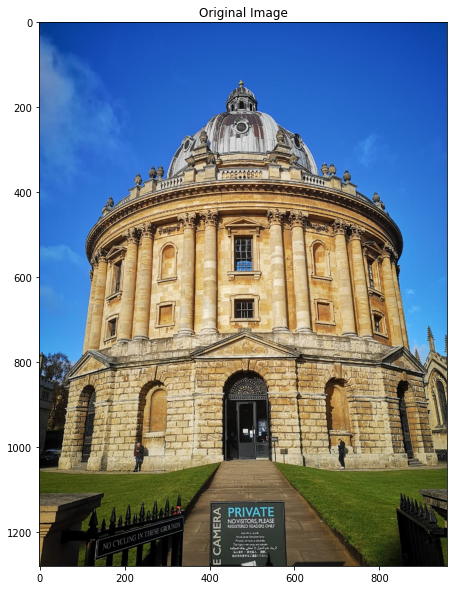

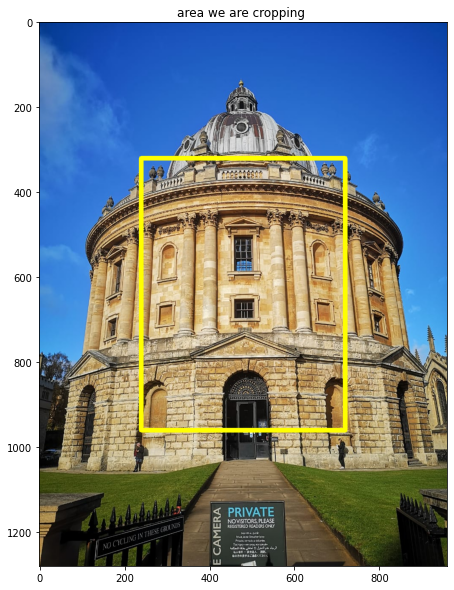

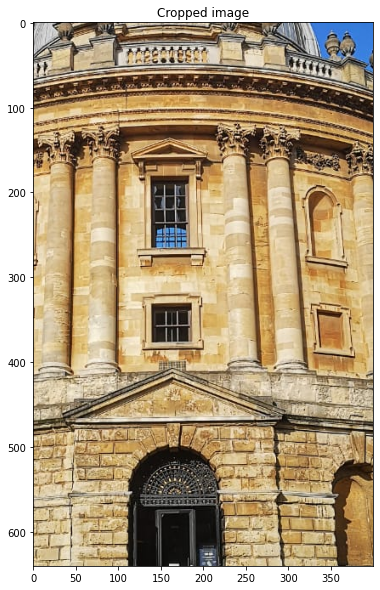

In [17]:
image = cv2.imread('/content/images/oxfordlibrary.jpeg')

height, width = image.shape[:2]
start_row, start_col =int(height*0.25),int(width*0.25)
end_row , end_col = int(height*0.75), int(width*0.75)
cropped = image[start_row:end_row, start_row:end_col]

imshow("Original Image", image)
copy = image.copy()
cv2.rectangle(copy, (start_col,start_row),(end_col,end_row), (0,255,255), 10)

imshow("area we are cropping ", copy)
imshow("Cropped image", cropped)